(참고) PyTorch로 딥러닝하기: 60분만에 끝장내기 (https://tutorials.pytorch.kr/beginner/deep_learning_60min_blitz.html)

# 텐서

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


## 텐서 초기화

In [2]:
data = [[1, 2],
        [3, 4]]
print(f"data:\n{data}")

data:
[[1, 2], [3, 4]]


### 데이터로부터 직접 생성하기

In [3]:
x_data = torch.tensor(data)
print(f"x_data:\n{x_data}")

x_data:
tensor([[1, 2],
        [3, 4]])


### NumPy 배열로부터 생성하기

In [4]:
np_array = np.array(data)
print(f"np_array:\n{np_array}")

x_np = torch.from_numpy(np_array)
print(f"x_np:\n{x_np}")

np_array:
[[1 2]
 [3 4]]
x_np:
tensor([[1, 2],
        [3, 4]])


### 다른 텐서로부터 생성하기

In [5]:
x_ones = torch.ones_like(x_data) # x_data의 shape, dtype 유지
print(f"x_ones:\n{x_ones}")

x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 shape 유지
print(f"x_rand:\n{x_rand}")

x_ones:
tensor([[1, 1],
        [1, 1]])
x_rand:
tensor([[0.3189, 0.7004],
        [0.1955, 0.7783]])


### 무작위 또는 상수 값을 사용하기

In [6]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zero_tensor = torch.zeros(shape)

print(f"rand_tensor:\n{rand_tensor}")
print(f"ones_tensor:\n{ones_tensor}")
print(f"zero_tensor:\n{zero_tensor}")

rand_tensor:
tensor([[0.4392, 0.9149, 0.6577],
        [0.2262, 0.4148, 0.2159]])
ones_tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
zero_tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## 텐서의 속성

In [7]:
tensor = torch.rand(3, 4)

print(f"Shape: {tensor.shape}")
print(f"Datatype: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape: torch.Size([3, 4])
Datatype: torch.float32
Device tensor is stored on: cpu


## 텐서 연산

In [8]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


### NumPy식의 표준 인덱싱과 슬라이싱

In [9]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=0) # dim=0 쪽으로
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
t2 = torch.cat([tensor, tensor, tensor], dim=1) # dim=1 쪽으로
print(t2)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [12]:
# element-wise product
print(f"tensor.mul(tensor):\n{tensor.mul(tensor)}")

print(f"tensor * tensor:\n{tensor * tensor}")

tensor.mul(tensor):
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor * tensor:
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [13]:
print(f"tensor.matmul(tensor.T) \n {tensor.T.matmul(tensor)} \n")

print(f"tensor @ tensor.T \n {tensor.T @ tensor}")

tensor.matmul(tensor.T) 
 tensor([[4., 0., 4., 4.],
        [0., 0., 0., 0.],
        [4., 0., 4., 4.],
        [4., 0., 4., 4.]]) 

tensor @ tensor.T 
 tensor([[4., 0., 4., 4.],
        [0., 0., 0., 0.],
        [4., 0., 4., 4.],
        [4., 0., 4., 4.]])


In [14]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")

print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [ ]:
# in-place operation: 객체의 값을 변경
# 메모리를 일부 절약하지만, 기록이 즉시 삭제됨
# 도함수 계산에 문제가 발생할 수 있어 사용을 권장하지 않음
print(tensor)
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## NumPy 변환

### 텐서를 NumPy 배열로 변환하기

In [17]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [18]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy 배열을 텐서로 변경하기

In [19]:
n = np.ones(5)
t = torch.from_numpy(n)

In [20]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# `torch.autograd`

In [22]:
from torchvision.models import resnet18, ResNet18_Weights

In [23]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

6.7%

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/msj99/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100.0%


In [27]:
pred = model(data) # pred.shape = (1, 1000)

In [ ]:
loss = (pred - labels).sum()
loss.backward() # Autograd가 parameter.grad에 gradient를 계산하고 저장

In [ ]:
# optimizer에 모델의 모든 parameter를 등록
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [ ]:
optim.step() # gradient descent

## Autograd에서 미분

In [34]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

print(f"a:\n{a}")
print(f"b:\n{b}")

a:
tensor([2., 3.], requires_grad=True)
b:
tensor([6., 4.], requires_grad=True)


오차 $Q = 3a^3 - b^2$로 정의

In [35]:
Q = 3 * a**3 - b**2

`Q.backward()` $\rightarrow$ autograd가 $\frac{\partial Q}{\partial a} = 9a^2, \frac{\partial Q}{\partial b} = -2b$를 계산하고 `a.grad, b.grad`에 저장

이때 `.backward()`는 기본적으로 스칼라 값에 대한 미분을 수행하도록 설계되어 있어,

$Q$가 벡터인 경우 어떤 값을 기준으로 미분해야 할지 모르므로 각 element의 비중을 똑같이 설정 ($\frac{dQ}{dQ}=1$)

In [36]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

# same as Q.sum().backward()

In [37]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


## `external_grad`의 의미

벡터 함수 $\vec{y}=f(\vec{x})$에서 $\vec{x}$에 대한 $\vec{y}$의 변화율은 Jacobian matrix $J$

$$
J=\left( \frac{\partial \mathbf{y}}{\partial x_1} \ \dots \ \frac{\partial \mathbf{y}}{\partial x_n} \right)=
\begin{pmatrix}
\frac{\partial y_1}{\partial x_1} && \cdots && \frac{\partial y_1}{\partial x_1} \\
\vdots && \ddots && \vdots \\
\frac{\partial y_m}{\partial x_1} && \cdots && \frac{\partial y_m}{\partial x_1}
\end{pmatrix}
$$

`torch.autograd`는 주어진 어떤 벡터 $\vec{v}$에 대해 $J^T \cdot \vec{v}$를 연산

만약 $\vec{v}$가 스칼라 함수 $l=g(\vec{y})$의 gradient인 경우:
$\vec{v}=
\begin{pmatrix}
\frac{\partial l}{\partial y_1} \\ \vdots \\ \frac{\partial l}{\partial y_m}
\end{pmatrix}
$ 이므로
$$
J^T \cdot \vec{v} = 
\begin{pmatrix}
\frac{\partial y_1}{\partial x_1} && \cdots && \frac{\partial y_1}{\partial x_1} \\
\vdots && \ddots && \vdots \\
\frac{\partial y_m}{\partial x_1} && \cdots && \frac{\partial y_m}{\partial x_1}
\end{pmatrix}
\begin{pmatrix}
\frac{\partial l}{\partial y_1} \\ \vdots \\ \frac{\partial l}{\partial y_m}
\end{pmatrix}
=
\begin{pmatrix}
\frac{\partial l}{\partial x_1} \\ \vdots \\ \frac{\partial l}{\partial x_n}
\end{pmatrix}
$$

이때 `external_grad`가 $\vec{v}$를 의미

## 연산 그래프

autograd는 데이터 및 실행된 모든 연산들을 `Function` 객체로 구성된 Directed Acyclic Graph(DAG)에 저장

DAG의 leaf: 입력 텐서, DAG의 root: 결과 텐서이므로 root $\rightarrow$ leaf = chain rule

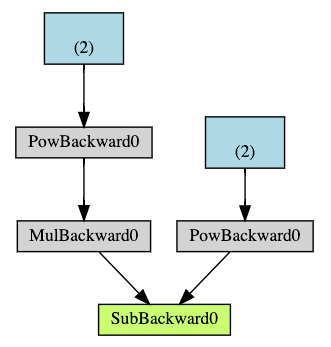

(파란색 노드는 leaf 텐서 `a`와 `b`)

root에서 `.backward()`가 호출되면:
- 각 `.grad_fn`으로부터 gradient 계산
- 각 텐서의 `.grad`에 계산 결과를 accumulate
- root $\rightarrow$ leaf propagate

※ `.backward()`가 호출될 때마다 DAG를 처음부터 다시 생성

## DAG에서 제외하기

In [38]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients?: {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients?: False
Does `b` require gradients?: True


In [40]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)

for param in model.parameters():
    param.requires_grad = False

# ResNet에서 classifier는 마지막 layer인 model.fc
model.fc = nn.Linear(512, 10)

# classifier만 최적화
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# 신경망

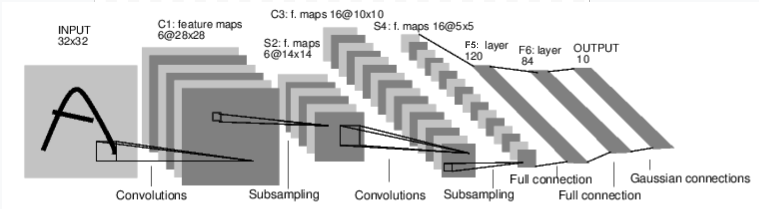

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # 입력 채널 1개, 출력 채널 6개, 5x5 커널
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        # (in_features, out_features)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # Convolution layer C1 (5x5 커널)
        # 활성화 함수: ReLU, 출력: (N, 6, 28, 28)
        c1 = F.relu(self.conv1(input))

        # Subsampling layer S2 (2x2 커널)
        # parameter 없음, 출력: (N, 6, 14, 14)
        s2 = F.max_pool2d(c1, (2, 2))

        # Convolution layer C3 (5x5 커널)
        # 활성화 함수: ReLU, 출력: (N, 16, 10, 10)
        c3 = F.relu(self.conv2(s2))

        # Subsampling layer S4 (2x2 커널)
        # parameter 없음, 출력: (N, 16, 5, 5)
        s4 = F.max_pool2d(c3, 2)

        # Flatten
        # parameter 없음, 출력: (N, 400)
        s4 = torch.flatten(s4, 1)

        # Fully connected layer F5
        # 활성화 함수: ReLU, 출력: (N, 120)
        f5 = F.relu(self.fc1(s4))

        # Fully connected layer F6
        # 활성화 함수: ReLU, 출력: (N, 84)
        f6 = F.relu(self.fc2(f5))

        # Gaussian layer
        # 출력: (N, 10)
        output = self.fc3(f6)

        return output
    
    # same as forward(self, input)
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # same as (2, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [42]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [43]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0655, -0.1170, -0.0054,  0.0752, -0.0976, -0.0245,  0.0388, -0.0841,
          0.1087, -0.1501]], grad_fn=<AddmmBackward0>)


In [44]:
net.zero_grad()
out.backward(torch.randn(1, 10))

※ `torch.nn`은 하나의 샘플이 아닌 샘플들의 미니배치만을 입력으로 받음

# 손실 함수

In [46]:
output = net(input)
target = torch.randn(10)  # 예시를 위한 임의의 정답
target = target.view(1, -1)  # 출력과 같은 shape로 만듦
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.4896, grad_fn=<MseLossBackward0>)


In [ ]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU
# ...

연산 그래프:  
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-> flatten -> linear -> relu -> linear -> relu -> linear  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-> MSELoss   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-> loss  

## 역전파

In [48]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0038, -0.0111,  0.0036,  0.0041,  0.0034, -0.0077])


## 가중치 갱신

In [ ]:
# 가장 단순한 갱신: SGD
lr = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * lr)

In [50]:
# torch.optim으로 다양한 갱신 규칙 사용 가능
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# training loop
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target) # criterion = nn.MSEloss()로 정의했었음
loss.backward()
optimizer.step()

※ gradient는 누적되므로, `optimizer.zero_grad`를 사용하여 gradient 버퍼를 0으로 설정하는 것에 유의